# Курс по машинному обучению,   ВМК МГУ
# Основы numpy + matplotlib + pandas

### О задании

Задание состоит из трех частей, посвященных работе с табличными данными с помощью библиотеки **pandas**, визуализации с помощью библиотек **matplotlib**, **seaborn**, **plotly** и векторным вычислениям с помощью библиотеки **numpy**. Вам предлагается выполнить несколько заданий. 

# Часть 1. Pandas

В этой части мы познакомимся с библиотекой **pandas**. **Pandas** — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера.

С помощью встроенных инструментов **pandas** можно легко:
- считывать табличные данные (в форматах csv, json, xlsx)
- представлять собственные данные в виде таблиц и сохранять их
- считать статистики 
- визулизировать данные 
- производить обработку данных
- и много всего еще...

Основные объекты в **pandas**:

* **Series** (серия) — одномерная структура данных, в которой каждый элемент имеет свой индекс.
* **DataFrame** (датафрейм) - табличная структура данных, представляющая собой таблицу с именованными колонками различных типов и индексами строк.


Полезные материалы:
1. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html)
2. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Далее потребуется выполнить несколько небольших заданий, покрывающих базовый функционал библиотеки. 

### Важно!

* **Все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования</font>.**

* **Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Не забывайте, что можно гуглить и что-то искать на stackoverflow, например.**

* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**

* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**
* **Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком (?)**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Используйте файл с датасетом netflix_titles.csv из той же папки c заданием, в которой лежит текущий ноутбук.**

#### Задание 1 (0.4 балла).
* **(0.2 балла)** Откройте файл с таблицей и выведите последние 5 строк.
* **(0.2 балла)** **(?)** Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк и столбцов?

Полезные материалы: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/02_read_write.html 

In [271]:
data = pd.read_csv('drive/My Drive/netflix_titles.csv')

In [ ]:
data.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Ответ**: Данные представляют таблицу из 7787 строк и 12 столбцов с информацией о фильмах и ТВ шоу: тип, название, режиссер, актерский состав и тд.

#### Задание 2 (0.6 балла). Ответьте на вопросы:
* **(0.2 балла)** **(?)** Сколько представлено уникальных категорий рейтинга? (колонка rating)
* **(0.2 балла)** **(?)** Сколько объектов каждого типа попало в таблицу? (колонка type)
* **(0.2 балла)** **(?)**  Какой минимальный год релиза для объектов, попавших в таблицу? (колонка release_year)

Базовый функционал, необxодимый для решения, можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html).

In [ ]:
data['rating'].nunique()

14

In [ ]:
pd.value_counts(data.type.values.ravel()) 


Movie      5377
TV Show    2410
dtype: int64

In [ ]:
data['release_year'].min()

1925

**Ответ**: 
1. 14
2. Movie - 5377 | TV Show - 2410
3. 1925

#### Задание 3 (0.6 балла)

**(0.2 балл)** **(?)** Есть ли в данных пропуски? В каких колонках? 

Про работу с пропущенными значениями можно прочитать [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

In [ ]:
data.columns[data.isna().any()].tolist()

['director', 'cast', 'country', 'date_added', 'rating']

**Ответ**: Да, есть. В колонках: 'diretor', 'cast', 'country', 'date_added' и 'rating'

**(0.2 балла)** Заполните пропуски пустой строкой для всех колонок, где кол-во отсутствующих значений > 500. Для проверки корректности после замены выведите кол-во пропусков во всех столбцах и общее кол-во строк в таблице.

In [272]:
info = data.isna().sum(axis = 0)
for key, val in info.items():
  if val > 500:
    data[key].fillna('', inplace = True)

In [ ]:
print(data.isna().sum())
print('Number of rows: ', len(data.index))

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64
Number of rows:  7787


**(0.2 балла)** Удалите строки с оставшимися отсутствующими значениями. Для проверки корректности после замены выведите кол-во пропусков во всех столбцах и общее кол-во строк в таблице.

In [273]:
data.dropna(axis=0, inplace=True)

In [ ]:
print(data.isna().sum())
print('Number of rows: ', len(data.index))

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
Number of rows:  7770


#### Задание 4 (0.6 балла). Посмотрите на колонку date_added
* **(0.3 балла)(?)** Какого она типа? Измените тип колонки на datetime. Покажите, что после изменения колонка действительно имеет тип datetime.
* **(0.3 балла)(?)** В какой год на сайт было добавлено больше всего объектов?

Полезные материалы: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 

In [ ]:
print(data['date_added'].dtype)

datetime64[ns]


In [ ]:
data.date_added = pd.to_datetime(data['date_added'])

In [ ]:
print(data['date_added'].dtype)

datetime64[ns]


In [ ]:
pd.value_counts(data.date_added.dt.year.values.ravel()).head(1)

2019    2153
dtype: int64

**Ответ**: Изначальный тип - object.

**Ответ**: 2019 год

#### Задание 5 (0.5 балла). Посмотрите на колонку duration.
* **(0.2 балла) (?)** В каких единицах измеряется длительность для каждого типа объекта? (колонка type)

In [ ]:
print(data['type'].unique())

['TV Show' 'Movie']


In [ ]:
tvs, mv = data.groupby('type').get_group('TV Show'), data.groupby('type').get_group('Movie')
tvs.duration, mv.duration

(0       4 Seasons
 5        1 Season
 11       1 Season
 12       1 Season
 16       1 Season
           ...    
 7767     1 Season
 7775     1 Season
 7777    2 Seasons
 7779     1 Season
 7785     1 Season
 Name: duration, Length: 2410, dtype: object, 1        93 min
 2        78 min
 3        80 min
 4       123 min
 6        95 min
          ...   
 7781     88 min
 7782     99 min
 7783    111 min
 7784     44 min
 7786     90 min
 Name: duration, Length: 5377, dtype: object)

**Ответ**: Фильмы измеряются в минутах, ТВ Шоу - в сезонах

* **(0.3 балла)** Преобразуйте колонку так, чтобы осталось только число, убрав единицы измерения. Покажите, что после изменения колонка меет тип int. Выведите новые значения колонки duration в первых 5 строках. 

Для этого может помочь функция-преобразования [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html). 

In [283]:
data['duration'] = data['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
data.duration.head(5)

0      4
1     93
2     78
3     80
4    123
Name: duration, dtype: int64

#### Задание 6 (0.4 балла).
* **(?)** Какие 5 сериалов (в колонке type значениe TV Show) наиболее продолжительны (колонка duration)? В качестве ответа привидите названия (колонка title) нужных сериалов отосртированных по убыванию продолжительности. В случае одинаковой длительности отсортировать значения по возрастанию года релиза (колонка release_year).

Для решения воспользуйтесь функцией [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html).

In [117]:
data.groupby('type').get_group('TV Show').sort_values(by=['duration','release_year'], ascending=[False, True]).head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2538,s2539,TV Show,Grey's Anatomy,,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,2019,TV-14,16,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2021-10-21,2019,TV-14,16,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4438,s4439,TV Show,NCIS,,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
1471,s1472,TV Show,COMEDIANS of the world,,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
1537,s1538,TV Show,Criminal Minds,,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada",2017-06-30,2017,TV-14,12,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...


**Ответ**: 

1.   Grey's Anatomy
2.   Supernatural
3.   NCIS
4.   COMEDIANS of the world
5.   Criminal Minds




#### Задание 7 (0.4 балла).
* **(?)** Сколько сериалов (в колонке type значениe TV Show), выпущенных в 2018 году (колонка release_year), имеют рейтинг TV-MA (колонка rating)? 
Постарайтесь сделать решение в одну строку, используя для выбора строк несколько условий, объединяя их с помощью | вместо or, & вместо and и ~ вместо not.

In [ ]:
print('Number of series: ', len(data.groupby('type').get_group('TV Show').groupby('release_year').get_group(2018).groupby('rating').get_group('TV-MA')))

Number of series:  196


In [ ]:
print('Number of series: ',len(data.query('type == "TV Show" & release_year == 2018 & rating == "TV-MA"')))

Number of series:  196


**Ответ**: 196

#### Задание 8 (0.5 балла). 
* **(?)** Какая средняя продолжительность фильмов (в колонке type значениe Movie) в году для 2010-2015 годов (колонка release_year)? Для решения необходимо воспользоваться функцией [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

In [ ]:
data.query('release_year>=2010 & release_year<=2015').groupby('type').get_group('Movie').groupby('release_year').duration.mean()

**Ответ**: ВАШ ОТВЕТ ЗДЕСЬ

*   2010 - 104.4 min
*   2011 - 102.8 min
*   2012 - 100.6 min
*   2013 - 98.7 min
*   2014 - 100.2 min
*   2015 - 99. 8 min

#### Задание 9 (0.7  балла).  Предположим, что в 2021 году вышел 16 сезон сериала "Supernatural", но даные в таблице еще не успели обновить. Обновите нужные поля в соотвествующей строке. Будем считать, что дата выхода сериала в таблице соответствует выходу последнего сезона. Дату добавления на сайт можете выбрать произвольно. Выведите строку с исправленными полями.  Проверьте, что тип колонки date_added остался datetime.

Обратите внимание, что при выборе полей с помощью оператора индексирования \[\] возвращается копия выбранных значений. При попытке присвоить таким образом новые значения для некоторых полей таблицы, будет выдано предупреждение. Более надежный способ - использовать операторы loc и iloc. Подробнее про индексацию и выбор строк можно прочитать [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

In [ ]:
data.query('title == "Supernatural"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."


In [ ]:
from datetime import date
data.loc[data['title'] == 'Supernatural', 'duration'] = 16
data.loc[data['title'] == 'Supernatural', 'date_added'] = date(2021,10,21)


In [ ]:
data.query('title == "Supernatural"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2021-10-21,2019,TV-14,16,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."


In [ ]:
print(data.query('title == "Supernatural"').date_added.dtype)

datetime64[ns]


#### Задание 10 (0.8 баллов).
* **(?)** Какие две самые популярные страны, в которых было снято больше всего фильмов и сериалов (все объекты вместе)? Обратите внимание, что каждый фильм или сериал может быть снят сразу в нескольких странах.

Для предобработки данных может помочь функция [explode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html).

In [131]:
pd.value_counts(data['country'].apply(lambda x: x.split(",")).explode()).head(2)

United States    2874
India             956
Name: country, dtype: int64

**Ответ**: ВАШ ОТВЕТ ЗДЕСЬ

1.   United States
2.   India



# Часть 2. Визуализация данных

При работе с данными важно уметь быстро и качественно их визуализировать для того, чтобы делать какие-то выводы. В этом разделе мы познакомимся с несколькими библиотеками для анализа данных, которые нам в этом помогут.

## Matplotlib

**Matplotlib** - основная библиотека визуализации двумерных данных на языке python.

Рисунок создается с помощью последовательного вызова функций из модуля **pyplot** (создание рисунка, задание области рисования, построение графиков в области рисования, украшение графика метками). При этом различные графические элементы рисунка (линии, подписи и т.д.) перекрывают предыдущие, если они имеют общую площадь.

### Основные типы графиков:
- line plot — обычный поточечный график, которым можно изображать кривые, соединяющие последовательные точки;
- histogram — гистограмма, показывающая распределение некоторое величины;
- scatter plot — диаграмма рассеивания, показывающая взаимосвязь двух величин;
- bar plot — столбчатая диаграмма, показывающий взаимосвязь количественной величины от категориальной.

### Оформление графиков

Важно, чтобы все графики выглядели опрятно и соответствовали следующим правилам:

- должно быть название (plt.title) графика; 
- на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); 
- должны быть подписаны единицы измерения (если это возможно); 
- все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; 
- подписи тиков на осях не должны сливаться как на одной оси, так и между ними; 
- если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); 
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
- при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
Далее приведены примеры построения основных типов графиков, больше примеров Вы можете найти в [документации](https://matplotlib.org/examples/).

In [132]:
import matplotlib
import matplotlib.pyplot as plt

#отображение графиков в ноутбуке
%matplotlib inline 

#для четкой прорисовки графиков
%config InlineBackend.figure_format = 'svg' 

### Важно!

* **Если ниже вместо графиков вы видите строчки вида <Figure size 720x288 with 1 Axes>, необходимо сделать ноутбук доверенным (File -> Trust Notebook).**
* **Если проблема отображения графиков не решается способом выше, то удалите, строчку %config InlineBackend.figure_format = 'svg' и перезапустите кернел.**

### Пример:  поточечный график ([plt.plot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html))

Построим на одном рисунке графики функций $y = sin (x)$ и $y = 2 sin(2x)$.

In [152]:
import math

In [153]:
x_vals = [x * 0.1  for x in range(-100, 100)]
y_vals_1 = [math.sin(x) for x in x_vals]
y_vals_2 = [2 * math.sin(2 * x) for x in x_vals]

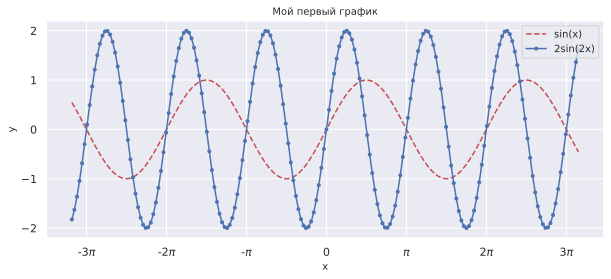

In [154]:
# задаем размеры
plt.figure(figsize=(10,4))

# заголовок 
plt.title('Мой первый график', fontsize=10)

# рисуем графики
plt.plot(x_vals, y_vals_1, linestyle='--', color='r', label='sin(x)')
plt.plot(x_vals, y_vals_2,  marker='.', label='2sin(2x)')

# linestyle: '--' - dashed line style, '-.'- dash-dot line style, ...
# color: r, g, b, ...
# marker: '.', 'o', '+', ...

# сетка графика
plt.grid(True) 

# разметка осей
plt.xticks([math.pi * x for x in range(-3, 4)], ["-3$\pi$", "-2$\pi$", "-$\pi$", "0", "$\pi$", "2$\pi$", "3$\pi$"])
plt.yticks(range(-2, 3))

# подписи осей
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)

# легенда
plt.legend(fontsize=10)

plt.show()

# сохранить
#plt.savefig('fig.pdf')

Несколько графиков на одном рисунке:

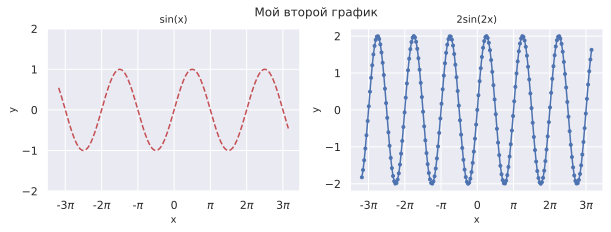

In [155]:
# задаем размеры всей области
plt.figure(figsize=(10,3))

# заголовок ко всему рисунку
plt.suptitle('Мой второй график', fontsize=12)



# 1 область для рисования
plt.subplot(1, 2, 1) 

# заголовок для текущей области 
plt.title('sin(x)',fontsize=10)

# рисуем 1 график
plt.plot(x_vals, y_vals_1, linestyle='--', color='r')

# сетка графика
plt.grid(True) 

# разметка осей
plt.xticks([math.pi * x for x in range(-3, 4)], 
           ['-3$\pi$', '-2$\pi$', '-$\pi$', '0', '$\pi$', '2$\pi$', '3$\pi$'])
plt.yticks(range(-2, 3))

# подписи осей
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)



# 2 область для рисования
plt.subplot(1, 2, 2)

# заголовок для текущей области 
plt.title('2sin(2x)',fontsize=10)

# рисуем 2 график
plt.plot(x_vals, y_vals_2,  marker='.')

# сетка графика
plt.grid(True) 

# разметка осей
plt.xticks([math.pi * x for x in range(-3, 4)], 
             ['-3$\pi$', '-2$\pi$', '-$\pi$', '0', '$\pi$', '2$\pi$', '3$\pi$'])
plt.yticks(range(-2, 3))

# подписи осей
plt.ylabel('y',  fontsize=10)
plt.xlabel('x',  fontsize=10)

plt.show()

А можно делать сетку из графиков:

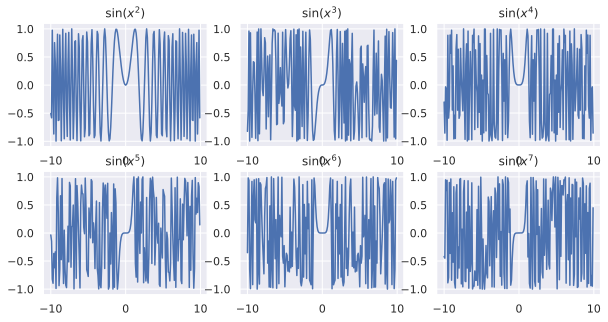

In [156]:
# задаем размеры всей области
plt.figure(figsize=(10,5))

for i in range(1, 7):
    
    #задаем местоположение поля с графиком
    plt.subplot(2, 3, i)
    
    # заголовок для текущей области 
    plt.title(f'sin$(x^{i+1})$')

    # рисуем график в текцщей области
    plt.plot(x_vals, [math.sin(x**(i + 1)) for x in x_vals])

    # сетка графика
    plt.grid(True) 

plt.show()

### Пример:  гистограмма ([plt.hist](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html))

Возьмем два набора по 1000 точек из нормальных распределений с параметрами ($\mu=5, \sigma=2$) и ($\mu=-5, \sigma=5$) и сравним их распределения с помощью гистограмм. Для этого сгенерируем вектора точек с помощью библиотеки numpy, о которой поговорим в следующем разделе.

In [147]:
import numpy as np

In [148]:
x_vals_1 = np.random.normal(5, 2, size=10000)
x_vals_2 = np.random.normal(-5, 5, size=10000)

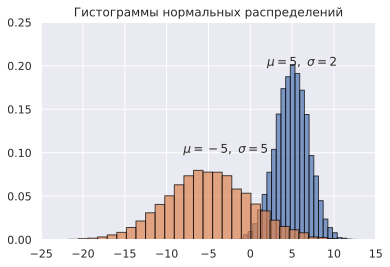

In [149]:
# заголовок 
plt.title('Гистограммы нормальных распределений')

# рисуем графики
plt.hist(x_vals_1, bins=30, alpha=0.7, edgecolor='black', density=True)
plt.hist(x_vals_2, bins=30, alpha=0.7, edgecolor='black', density=True)

# текст на графике
plt.text(2, 0.2, r'$\mu=5,\ \sigma=2$')
plt.text(-8, 0.1, r'$\mu=-5,\ \sigma=5$')

# границы осей
plt.xlim(-25, 15)
plt.ylim(0, 0.25)

# сетка графика
plt.grid(True) 

plt.show()

На что следует обращать внимание при построении гистограммы:
- размер бина (чем больше размер бина, тем более сглаженное распределение будет на графике);
- при построении нескольких гистограмм на одном графике они могут накладываться (]можно увеличить прозрачность).

### Пример:  диаграмма рассеивания ([plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html))

Для того, чтобы понять характер взаимосвязи двух переменных, удобно их изобразить в виде точек на плоскости. Это и делает диаграмма расеивания. Сгенерируем искусственные переменные $x$ и $y$ с зашумленной квадратичной зависимостью.

In [ ]:
x_vals = [x * 0.1  for x in range(0, 100)]
y_vals = [x**2 +  np.random.rand() * 10 for x in x_vals]

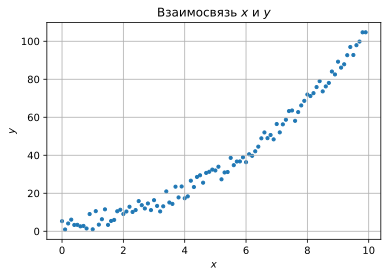

In [ ]:
# задаем размеры
plt.figure(figsize=(6,4))

# заголовок 
plt.title('Взаимосвязь $x$ и $y$')

# рисуем график
plt.scatter(x_vals, y_vals, s=10)

# подписи осей
plt.ylabel('$y$')
plt.xlabel('$x$')

# сетка графика
plt.grid(True) 

plt.show()

### Пример:  столбчатая диаграмма ([plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html))

Вспомним про табличные данные из 1 части задания и посмотрим на зависимость кол-ва добавленных фильмов и сериалов от дня недели. В этом нам поможет столбчатая диаграмма.

In [133]:
data.dropna(subset=['date_added'], inplace=True)
data['date_added'] = pd.to_datetime(data['date_added'])
data['day_added'] = data['date_added'].dt.weekday

In [134]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']
days_dict = {i : day for i, day in enumerate(days)}
data = data.replace({'day_added': days_dict}) 

In [135]:
df_movies = data[data.type == 'Movie'].day_added.value_counts()
df_tv_shows = data[data.type == 'TV Show'].day_added.value_counts()

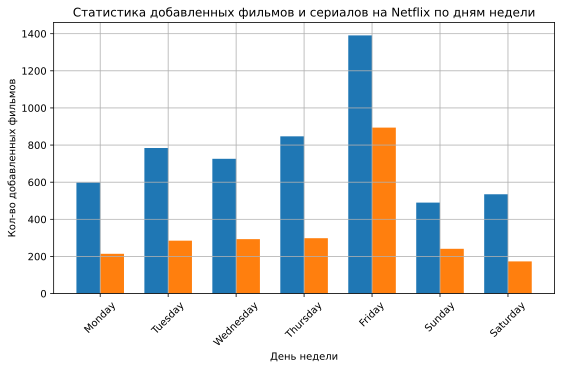

In [137]:
# задаем размеры
plt.figure(figsize=(9,5))

# заголовок 
plt.title('Статистика добавленных фильмов и сериалов на Netflix по дням недели')

# ширина столбцов
width = 0.35

# координаты столбцов
ids = np.arange(1,8)

# рисуем графики
plt.bar(ids - width / 2, df_movies[days].values, width)
plt.bar(ids + width / 2, df_tv_shows[days].values, width)

# метки по оси x
plt.xticks(ids, days, rotation=45)

# подписи осей
plt.xlabel('День недели')
plt.ylabel('Кол-во добавленных фильмов')

# сетка графика
plt.grid(True) 

plt.show()

Можно заметить, что больше всего фильмов и сериалов добавляют на сайт по пятницам :)

## Другие библиотеки: seaborn

**Seaborn** - более высокоуровневая библиотека визуализации данных на базе matplotlib, позволяющая очень быстро строить качественные графики для анализа данных. 

В **seaborn** есть:
* удобная интеграция с pandas;
* полезные для анализа данных шаблоны, реализация которых в matplotlib потребовала бы большого количества кода;
* красивые настройки оформления графиков.

Построим тот же график, что в предыдущем примере, только с помощью библиотект seaborn.

In [138]:
import seaborn as sns

# задает по умолчанию тему оформления графиков
sns.set() 

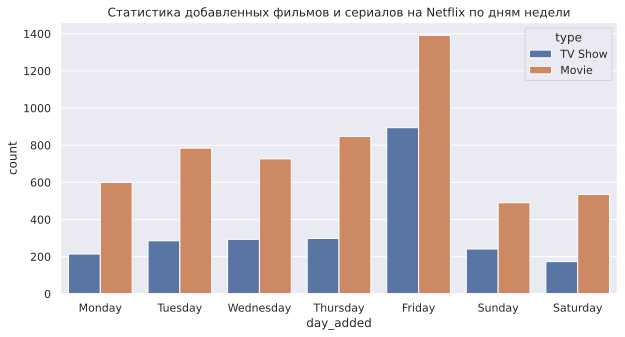

In [139]:
plt.figure(figsize=(10,5))
plt.title('Статистика добавленных фильмов и сериалов на Netflix по дням недели')
sns.countplot(data=data, x='day_added', hue='type', order=days)
plt.show()

Как видим, seaborn помогает избежать промежуточных вычислений и дополнительного оформления графика!

Далее приведем несколько других полезных для анализа данных типов графиков, которые можно быстро построить с помощью seaborn. Другие примеры можно найти в примерах [документации](http://seaborn.pydata.org/).

Стандартные датасеты для анализа данных можно загрузить с помощью встроенной функции load_dataset.

In [140]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [141]:
iris.shape

(150, 5)

### jointplot

jointplot объединяет на одном графике диаграмму рассеивания двух количественных переменных и гистограммы их распределений.

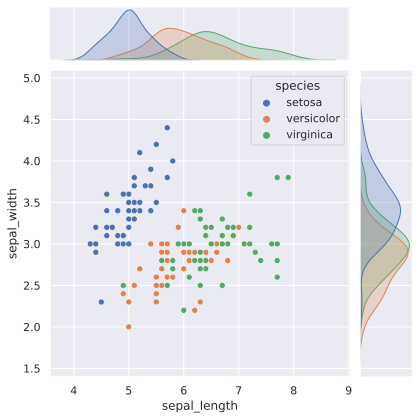

In [142]:
sns.jointplot(data=iris, x="sepal_length", y='sepal_width', hue="species")
plt.show()

### pairplot

pairplot похож на jointplot, но объединяет диаграммы рассеивания и гистограммы распределений сразу для всех количественных переменных в данных.

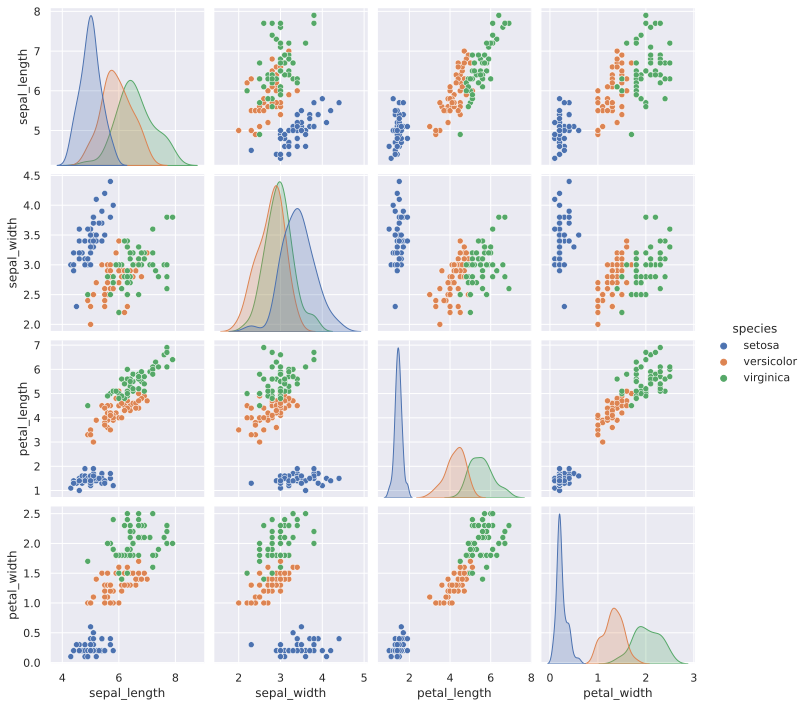

In [143]:
sns.pairplot(iris, hue="species")
plt.show()

### boxplot

boxplot - очень популярный в статистике график, удобный для сравнения нескольких распределений, в частности для анализа влияния категориальной переменной на количественную. 

Каждый box ограничен первым и третим квартилем, а линия посередине обозначает медиану распределения. Границы усов - минимальное и максимальное статистически значимое значение, а ромбы за границами - выбросы. 

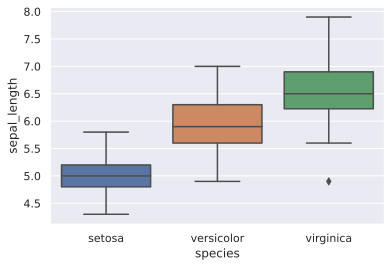

In [144]:
sns.boxplot(x='species', y="sepal_length", data=iris)
plt.show()

### lineplot

lineplot в seaborn похож на обычный поточечный график, но позволяет усреднять несколько значений переменной $y$ для одного значения переменной $x$ и рисовать доверительный интервал.

In [145]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


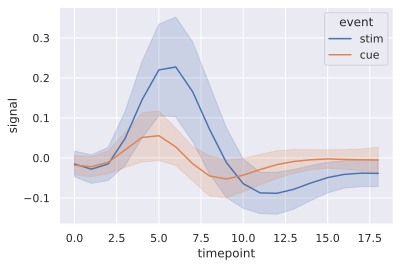

In [146]:
# рисуем среднее и разброс для значений x
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="event", ci="sd")
plt.show()

## Интерактивная визуализация: plotly

**Plotly** — это  библиотека, которая позволяет строить интерактивные графики в jupyter notebook. С ее помощью можно построить те же типы графиков, как и с помощью предыдущих библиотек. 

Особенность интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мышки, скрыть части визуализации, приблизить участки графика и т.д.

Для работы с табличными данными есть удобный модуль plotly express, позволяющий строить интерактивные графики в одну строку, аналогично seaborn. Убедимся в этом:

In [157]:
import plotly.express as px

In [158]:
fig = px.scatter(iris, x='sepal_length', y='sepal_width',
              color='species')
fig.show()

Детально вы можете ознакомиться с библиотекой с помощью [документации](https://plot.ly/python/).

Далее вам нужно построить несколько визуализаций табличных данных о фильмах и сериалах, с которыми мы работали в 1 части задания. 

### Важно!

* **Все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования</font>.**
* **Проверьте, что при конвертации в html формат все графики остаются видны. Это нужно для дальнейшей проверки в проверяющей системе.**
* **При решении заданий вы можете воспользоваться любыми средствами для визуализации.**
* **Все графики должны выглядеть опрятно и соответствовать правилам, перечисленным в начале Части 2. В случае несоответствия хотя бы 3 пунктам оценка снижается на 0.5 балла.**

#### Задание 1 (1.5 балла).  Постройте график (line plot) зависимости кол-ва выпущенных фильмов (в колонке type значениe Movie) от года выпуска .

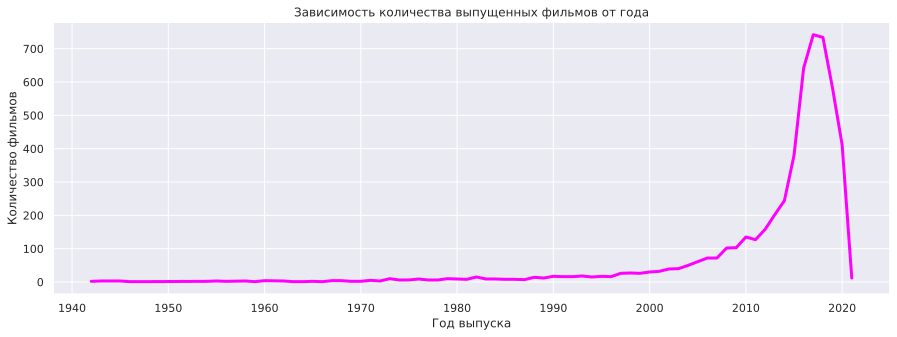

In [223]:
plt.figure(figsize=(15,5))
plt.title('Зависимость количества выпущенных фильмов от года')
frame = pd.DataFrame({'Год выпуска': data.groupby('type').get_group('Movie').release_year.value_counts().index, 'Количество фильмов': data.groupby('type').get_group('Movie').release_year.value_counts().values})
sns.lineplot(data=frame, x='Год выпуска', y='Количество фильмов',linewidth=3, color = 'magenta')
plt.show()

#### Задание 2 (1.5 балла). Постройте диаграмму  (bar plot) средней продолжительности фильмов (в колонке type значениe Movie) в зависимости от рейтинга.  

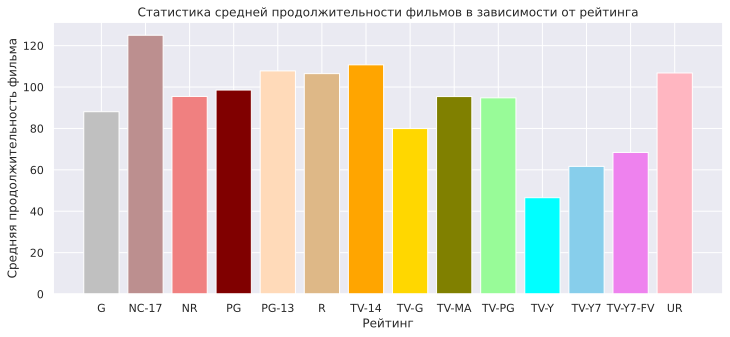

In [181]:
plt.figure(figsize=(12,5))
plt.title('Статистика средней продолжительности фильмов в зависимости от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Средняя продолжительность фильма')
plt.bar(data.groupby('type').get_group('Movie').groupby('rating').duration.mean().index, data.groupby('type').get_group('Movie').groupby('rating').duration.mean().values, color=['silver','rosybrown','lightcoral','maroon','peachpuff','burlywood','orange','gold','olive','palegreen','cyan','skyblue','violet','lightpink'])
plt.show()

#### Задание 3 (1.5 балла). Постройте график (scatter plot) зависимости продолжительности фильма от года его выпуска (каждому фильму должна соответствовать своя точка на графике).

In [211]:
fig = px.scatter(data, x='release_year', y='duration')
fig.show()

<function matplotlib.pyplot.show>

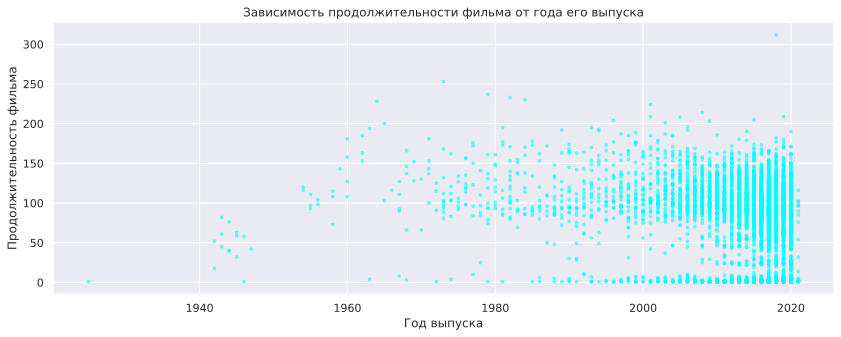

In [285]:
plt.figure(figsize=(14,5))
plt.title('Зависимость продолжительности фильма от года его выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Продолжительность фильма')
plt.scatter(data.release_year, data.duration, s = 8, alpha=0.5, color = 'aqua')
plt.show

# Часть 3. Numpy

Numpy - библиотека для работы с многомерными массивами данных для Python.

* Функционал библиотека сильно упрощает работу с масиивами по сравению с использованием списков.
* Благодаря транслированию Python-кода в С-код, выполение операций происхоит значительно быстрее.
* Некоторые функции поддерживают распараллеливание на несколько ядер.

Полезные ссылки:
* [Документация](https://numpy.org)
* [Подробное описание с примерами](https://www.tutorialspoint.com/numpy/numpy_advanced_indexing.htm)
* [100 задач на numpy с решениями](https://pythonworld.ru/numpy/100-exercises.html )

Далее рассмотрим базовый функуионал.

In [ ]:
import numpy as np

### Создание массива

In [ ]:
# из списка
x = [[0,1,2], [3,4,5], [6, 7, 9]]
x = np.array(x)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [ ]:
# из нулей
x = np.zeros((3, 2))
x

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# из единиц
x = np.ones((3, 2))
x

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
# размер массива
# для двумерного массива первая размерность - число строк, вторая - число столбцов
x.shape

(3, 2)

In [ ]:
# последовательность с шагом
x = np.arange(1, 10, 2)
x

array([1, 3, 5, 7, 9])

### Базовые операции над массивами

Важно, что в numpy операции над массивами происходят векторизованно для всех элементов массива сразу, причем вычисления столь же эффективны, как в языке C. 

In [ ]:
x = np.arange(10)
y = np.arange(15, 5, -1)
x, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([15, 14, 13, 12, 11, 10,  9,  8,  7,  6]))

In [ ]:
# поэлементное сложение
x + y

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [ ]:
# поэлементное умножение
x * y

array([ 0, 14, 26, 36, 44, 50, 54, 56, 56, 54])

In [ ]:
# поэлементный sin
np.sin(x)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
# нахождение максимума
np.amax(x * y)

56

In [ ]:
# нахождение аргмаксимума
np.argmax(x * y)

7

In [ ]:
# поэлементное сравнение
x > 5

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [ ]:
np.all(x > 5)

False

In [ ]:
np.any(x > 5)

True

### Типы и преобразование типов

In [ ]:
x = np.arange(15)
x.dtype

dtype('int64')

In [ ]:
y = np.array([1.5, 2.5])
y.dtype

dtype('float64')

In [ ]:
x = x.astype(np.float64)
x.dtype

dtype('float64')

### Изменение размера массивов

numpy-массивы всегда лежат в памяти последовательно, одним куском, поэтому у массива можно изменять размер практически бесплатно.

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x, x.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [ ]:
# вытянуть в вектор
x = x.ravel()
x, x.shape

(array([1, 2, 3, 4, 5, 6]), (6,))

In [ ]:
# добавить фиктивную размерность
x = x[:, np.newaxis]
x, x.shape

(array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]),
 (6, 1))

In [ ]:
# другой способ добавить фиктивную размерность
x = x.ravel()
x = x.reshape(-1, 1)
x, x.shape

(array([[1],
        [2],
        [3],
        [4],
        [5],
        [6]]),
 (6, 1))

In [ ]:
# изменить размерность, идем по строкам
x = x.reshape(3, 2)
x, x.shape

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 (3, 2))

### Операции над многомерными массивами

In [ ]:
x = np.array([[1, 2], [2, 1], [2, 3]])

In [ ]:
# транспонирование
x.T

array([[1, 2, 2],
       [2, 1, 3]])

In [ ]:
# матричное умножение
y = np.array([[0, 1, 0], [1, 0, 1]])
x.dot(y)

array([[2, 1, 2],
       [1, 2, 1],
       [3, 2, 3]])

In [ ]:
# матричное умножение
res = np.dot(x, y)
res, res.shape

(array([[2, 1, 2],
        [1, 2, 1],
        [3, 2, 3]]),
 (3, 3))

Некоторые из операций можно принять вдоль некоторых размерностей, задав аргумент axis. Как легко запомнить, как работает axis:
* после применения функции получится массив, в котором будет отсутствовать размерность указанная в axis, но остальные размерности будут иметь такие же значения

In [ ]:
x, x.shape

(array([[1, 2],
        [2, 1],
        [2, 3]]),
 (3, 2))

In [ ]:
# максимум в каждом столбце
np.amax(x, axis=0)

array([2, 3])

In [ ]:
# максимум в каждой строке
np.amax(x, axis=1)

array([2, 2, 3])

In [ ]:
# сумма по столбцам
np.sum(x, axis=0)

array([5, 6])

In [ ]:
# сумма по строкам
np.sum(x, axis=1)

array([3, 3, 5])

In [ ]:
# поставить массивы сбоку друг от друга (по горизонтали)
np.hstack((x, x))

array([[1, 2, 1, 2],
       [2, 1, 2, 1],
       [2, 3, 2, 3]])

In [ ]:
# поставить массивы сверху друг на друга (по вертикали)
np.vstack((x, x))

array([[1, 2],
       [2, 1],
       [2, 3],
       [1, 2],
       [2, 1],
       [2, 3]])

In [ ]:
# использование масок
mask = x == 1
mask

array([[ True, False],
       [False,  True],
       [False, False]])

In [ ]:
x[mask] = -1
x

array([[-1,  2],
       [ 2, -1],
       [ 2,  3]])

Для маски с несколькими условиями использовать логические операнды (например, & или |).

In [ ]:
x[(x == -1) | ( x == 2)] = 0
x

array([[0, 0],
       [0, 0],
       [0, 3]])

### Broadcasting

***Обязательно к прочтению!*** Подробное описание: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [ ]:
x = np.arange(10)
y = np.arange(5)

Можно складывать только массивы одного размера:

In [ ]:
x + y

ValueError: operands could not be broadcast together with shapes (10,) (5,) 

Или почти одного...

In [ ]:
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
x[:, np.newaxis] + y[np.newaxis, :]

array([[ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13]])

Если два массива имеют размерности (a_1, a_2 .. a_n) и (b_1, b_2 .. b_n) соответственно, то между ними можно проводить почленные операции, если для каждого i выполнено одно из трёх условий:
* либо a_i = b_i
* либо a_i = 1
* либо b_i = 1

### Индексация

In [ ]:
x = np.arange(20).reshape((4,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [ ]:
# взятие слайса
x[0:3, ::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14]])

Важное отличие от питоновских списков: при slicing возвращается **view**, а не копия! Это позволяет присваивать значения подматрицам.

In [ ]:
# взятие элементов по индексам каждой размерности
x[[0, 1, 3], [1, 4, 3]]

array([ 1,  9, 18])

### View и копирование

In [ ]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
y = x
y.shape = (2, 5)
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

View ссылается на те же данные, но позволяет задать другие размерности массива.

In [ ]:
x = np.arange(10)
v = x.view()
v.shape = (2, 5)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
v[0, 0] = 100
x

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

Если нужно получить копию массива, чтобы не портить переданные данные, пользуйтесь функцией copy()

In [ ]:
x = np.arange(10)
y = x.copy()
y[:] = 0
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.diag(np.array([[1,2,3], [3,4,5]]))

array([1, 4])

Далее приведены задачи на работу с numpy-массивами. 

## Важно! 
* **Файлы functions.py и functions_vectorized.py с реализованными функциями необходимо <font color='red'>сдать на тестирование</font> в проверяющей системе.**

### Задачи 1-6 (27 баллов).

Для каждой из задач ниже привидите 2 реализации: одна без использования numpy, а вторая полностью векторизованная (без использования циклов/map/list comprehension). Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные — в файл functions_vectorized.py (см. шаблоны). 

Невекторизованная реализация каждой из задач оценивается в __1.5 балла__, векторизованная – в __3 балла__.

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. Если ненулевых элементов на диагонали нет, то вернуть -1.\
  Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.
 

* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.\
   Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True. 
  

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Если нулевых элементов нет, то вернуть -1.\
  Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.
 

* __Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, num_channels), а также вектор весов длины num_channels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). ***Обратите внимание, что в изображении может быть не три канала!***\
  Например, для x = [[[1 , 2, 3], [4, 5, 6], [7, 8, 9]], [[1, 2, 3], [4, 5, 6], [7, 8, 9]]] ответ [[14, 32, 50], [14, 32, 50]].


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть два вектора одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.\
    Например, для x = np.array([2, 2, 2, 3, 3, 3, 5, 2]) ответ – np.array([2, 3, 5, 2]), np.array([3, 3, 1, 1]).
 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. 

__Замечание.__ Можно считать, что все входные данные непустые и коректные.

## Важно! 
* **Задание оценивается по системе <font color='red'>кросс-рецензирования</font>.**

### Задача 7 (3 балла).

*  **(2.5 балла)** Для каждой задачи сравните скорость работы невекторизованной и векторизованной реализации. Для этого постройте графики времени работы в зависимости от размера данных. 
*  **(0.5 балла) (?)**  Сделайте выводы о времени работы функций.

In [234]:
import functions_vectorised as fv
import functions as f
import time

In [235]:
import numpy as np

In [236]:
# генерация данных

prod_non_zero_diag_data = []
for n in [10, 100, 1000, 10000]:
    X = np.random.randint(0, 3, (n, n))
    prod_non_zero_diag_data += [X]

are_multisets_equal_data = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(0, 3, n)
    y = np.random.randint(0, 3, n)
    are_multisets_equal_data += [(x, y)]

max_after_zero_data = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(0, 3, n)
    max_after_zero_data += [x]

convert_image_data = []
for n in [10, 100, 1000]:
    image = np.random.random((n, n, 10))
    weights = np.random.random(10)
    convert_image_data += [(image, weights)]
     
run_length_encoding_data = []
for n in [10, 100, 1000, 10000]:
    x = np.random.randint(0, 3, n)
    run_length_encoding_data += [x]
      
pairwise_distance_data = []
for n in [10, 100, 500]:
    X = np.random.random((n, n))
    Y = np.random.random((n, n))
    pairwise_distance_data += [(X, Y)]

In [240]:
# функция для подсчета времени работы

def count_time(func, data):
    if len(data) > 2:
        tick = time.perf_counter() 
        func(data)
    else:
        tick = time.perf_counter() 
        func(*data)
    return (time.perf_counter() - tick)*1000

In [243]:
func=[f.prod_non_zero_diag, f.are_multisets_equal, f.max_after_zero, f.convert_image, f.run_length_encoding, f.pairwise_distance]
func_vectorised=[fv.prod_non_zero_diag, fv.are_multisets_equal, fv.max_after_zero, fv.convert_image, fv.run_length_encoding, fv.pairwise_distance]
metrics=[prod_non_zero_diag_data, are_multisets_equal_data, max_after_zero_data, convert_image_data, run_length_encoding_data, pairwise_distance_data]

In [244]:
times = []
for i, sets in enumerate(metrics):
    for j, args in enumerate(sets):
        times.append(['function', i, j, count_time(func[i], args)])
for i, sets in enumerate(metrics):
    for j, args in enumerate(sets):
        times.append(['function_vectorised', i, j, count_time(func_vectorised[i], args)])

In [268]:
resdtframe = pd.DataFrame(times, columns=['type', 'func_id', 'time_id', 'timing'])
names=['prod_non_zero_diag', 'are_multisets_equal', 'max_after_zero', 'convert_image', 'run_length_encoding', 'pairwise_distance']

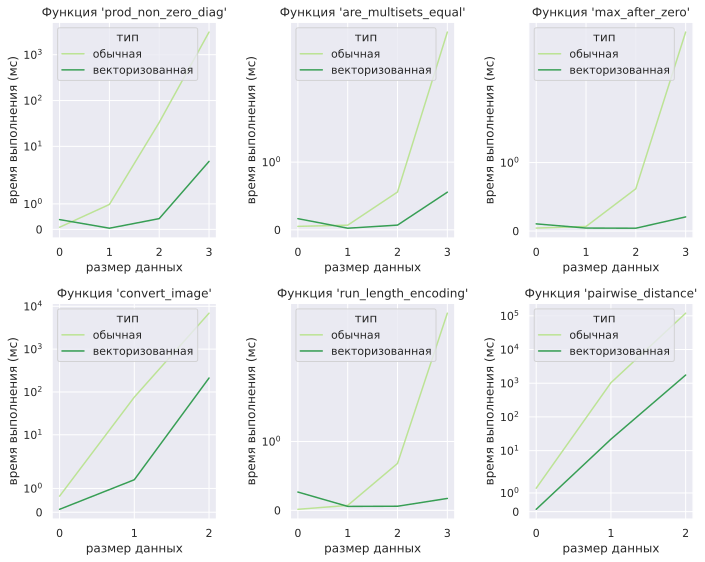

In [269]:
plt.figure(figsize=(10,8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title(f'Функция \'{names[i]}\'')
    ax = sns.lineplot(data=resdtframe[resdtframe['func_id'] == i], x='time_id', y='timing', hue='type', palette='YlGn')
    plt.grid(True) 
    plt.legend(title = 'тип', labels=('обычная', 'векторизованная'))
    ax.set(xlabel='размер данных', ylabel='время выполнения (мс)')
    ax.set_yscale('symlog')
    
plt.tight_layout()
plt.show()

**Выводы**: Векторизованные функции работают быстрее, чем невекторизованные при больших наборах данных. При маленьких наборах данных время работы, либо одинаково, либо невекторизованные функции оказываются быстрее.